In [1]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os, sys
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
load_dotenv()

SAMPLE_SUBMISSION_ROWS = os.environ.get("SAMPLE_SUBMISSION_ROWS")
TRAINING_DATA = os.environ.get("TRAINING_DATA")

In [3]:
# Obtain training data 

df = pd.read_csv(TRAINING_DATA)

df.head()

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
0,0,0,NaN,107.215862,26.686594,74.0,3682.75,138.0,111.0,14.0,...,49466.0,65923.0,0.000000,29.180,58.434969,32.500000,86.0,15.856826,168972,152285
1,0,0,NaN,35.552000,50.928261,3.0,1171.35,23.0,17.0,2.0,...,3638.0,7801.0,0.419355,28.465,5.392089,7.000000,125.0,6.998555,212404,39032
2,0,0,NaN,31.623103,48.837872,19.0,2295.38,47.0,42.0,11.0,...,3912.0,12868.0,0.836364,421.500,33.780445,0.000000,180.0,1.753009,225178,7439
3,0,0,NaN,112.277391,NaN,NaN,NaN,NaN,NaN,16.0,...,28919.0,23553.0,0.952381,50.000,37.340085,28.666667,134.0,9.000063,183948,485069
4,1,0,NaN,448.427273,NaN,NaN,NaN,NaN,NaN,5.0,...,1086.0,308.0,0.754386,69.509,77.794164,15.000000,114.0,1.767939,210107,536004


In [4]:
df.shape[0]

12229978

In [5]:
# Compute the correlation matrix between features

correlation_matrix = df.corr()

correlation_matrix

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
ind_recommended,1.000000,0.003215,0.008588,0.002103,-0.003528,0.042722,0.001908,0.036030,0.046077,0.042028,...,0.035140,0.037333,-0.014259,0.000218,0.056303,0.124680,0.014989,-0.037411,-0.009503,0.001897
activation,0.003215,1.000000,0.025995,-0.003050,-0.007459,0.094103,0.007667,0.076540,0.097470,0.051367,...,0.018727,0.028534,-0.005866,-0.010961,0.047093,0.016338,0.005493,-0.024814,-0.003934,0.000618
customer_digital_activity_04,0.008588,0.025995,1.000000,-0.003088,-0.011475,0.017589,0.001346,0.019339,0.024111,-0.003184,...,0.013788,0.032597,-0.013451,-0.022188,0.001391,0.005630,-0.013428,-0.021298,0.007011,0.005580
customer_spend_01,0.002103,-0.003050,-0.003088,1.000000,0.219168,-0.022321,0.144131,-0.015156,-0.022794,-0.008323,...,-0.000046,-0.001752,-0.008402,0.008095,0.018961,0.010449,0.011822,0.005673,-0.005831,-0.000383
customer_industry_spend_01,-0.003528,-0.007459,-0.011475,0.219168,1.000000,-0.050042,0.370825,-0.034709,-0.047623,0.041602,...,-0.069210,-0.068814,0.000598,0.051305,0.044118,0.008797,0.049894,0.027960,-0.029324,-0.000569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
customer_digital_activity_02,0.124680,0.016338,0.005630,0.010449,0.008797,0.080278,0.026526,0.072514,0.084198,0.140758,...,0.020756,0.009341,0.042050,0.007256,0.118245,1.000000,-0.034319,-0.046590,0.036352,0.000343
customer_profile_04,0.014989,0.005493,-0.013428,0.011822,0.049894,-0.078459,0.013770,-0.040392,-0.039925,0.082770,...,-0.063292,-0.083457,0.003598,0.043974,0.081893,-0.034319,1.000000,-0.084650,-0.616289,-0.000644
distance_05,-0.037411,-0.024814,-0.021298,0.005673,0.027960,-0.073940,-0.005588,-0.064463,-0.079061,-0.054624,...,-0.072124,-0.035129,0.064164,-0.012862,-0.050864,-0.046590,-0.084650,1.000000,0.040072,-0.001205
customer,-0.009503,-0.003934,0.007011,-0.005831,-0.029324,0.047854,-0.006488,0.026652,0.025432,-0.053770,...,0.036796,0.049371,-0.008412,-0.025722,-0.050814,0.036352,-0.616289,0.040072,1.000000,0.000416


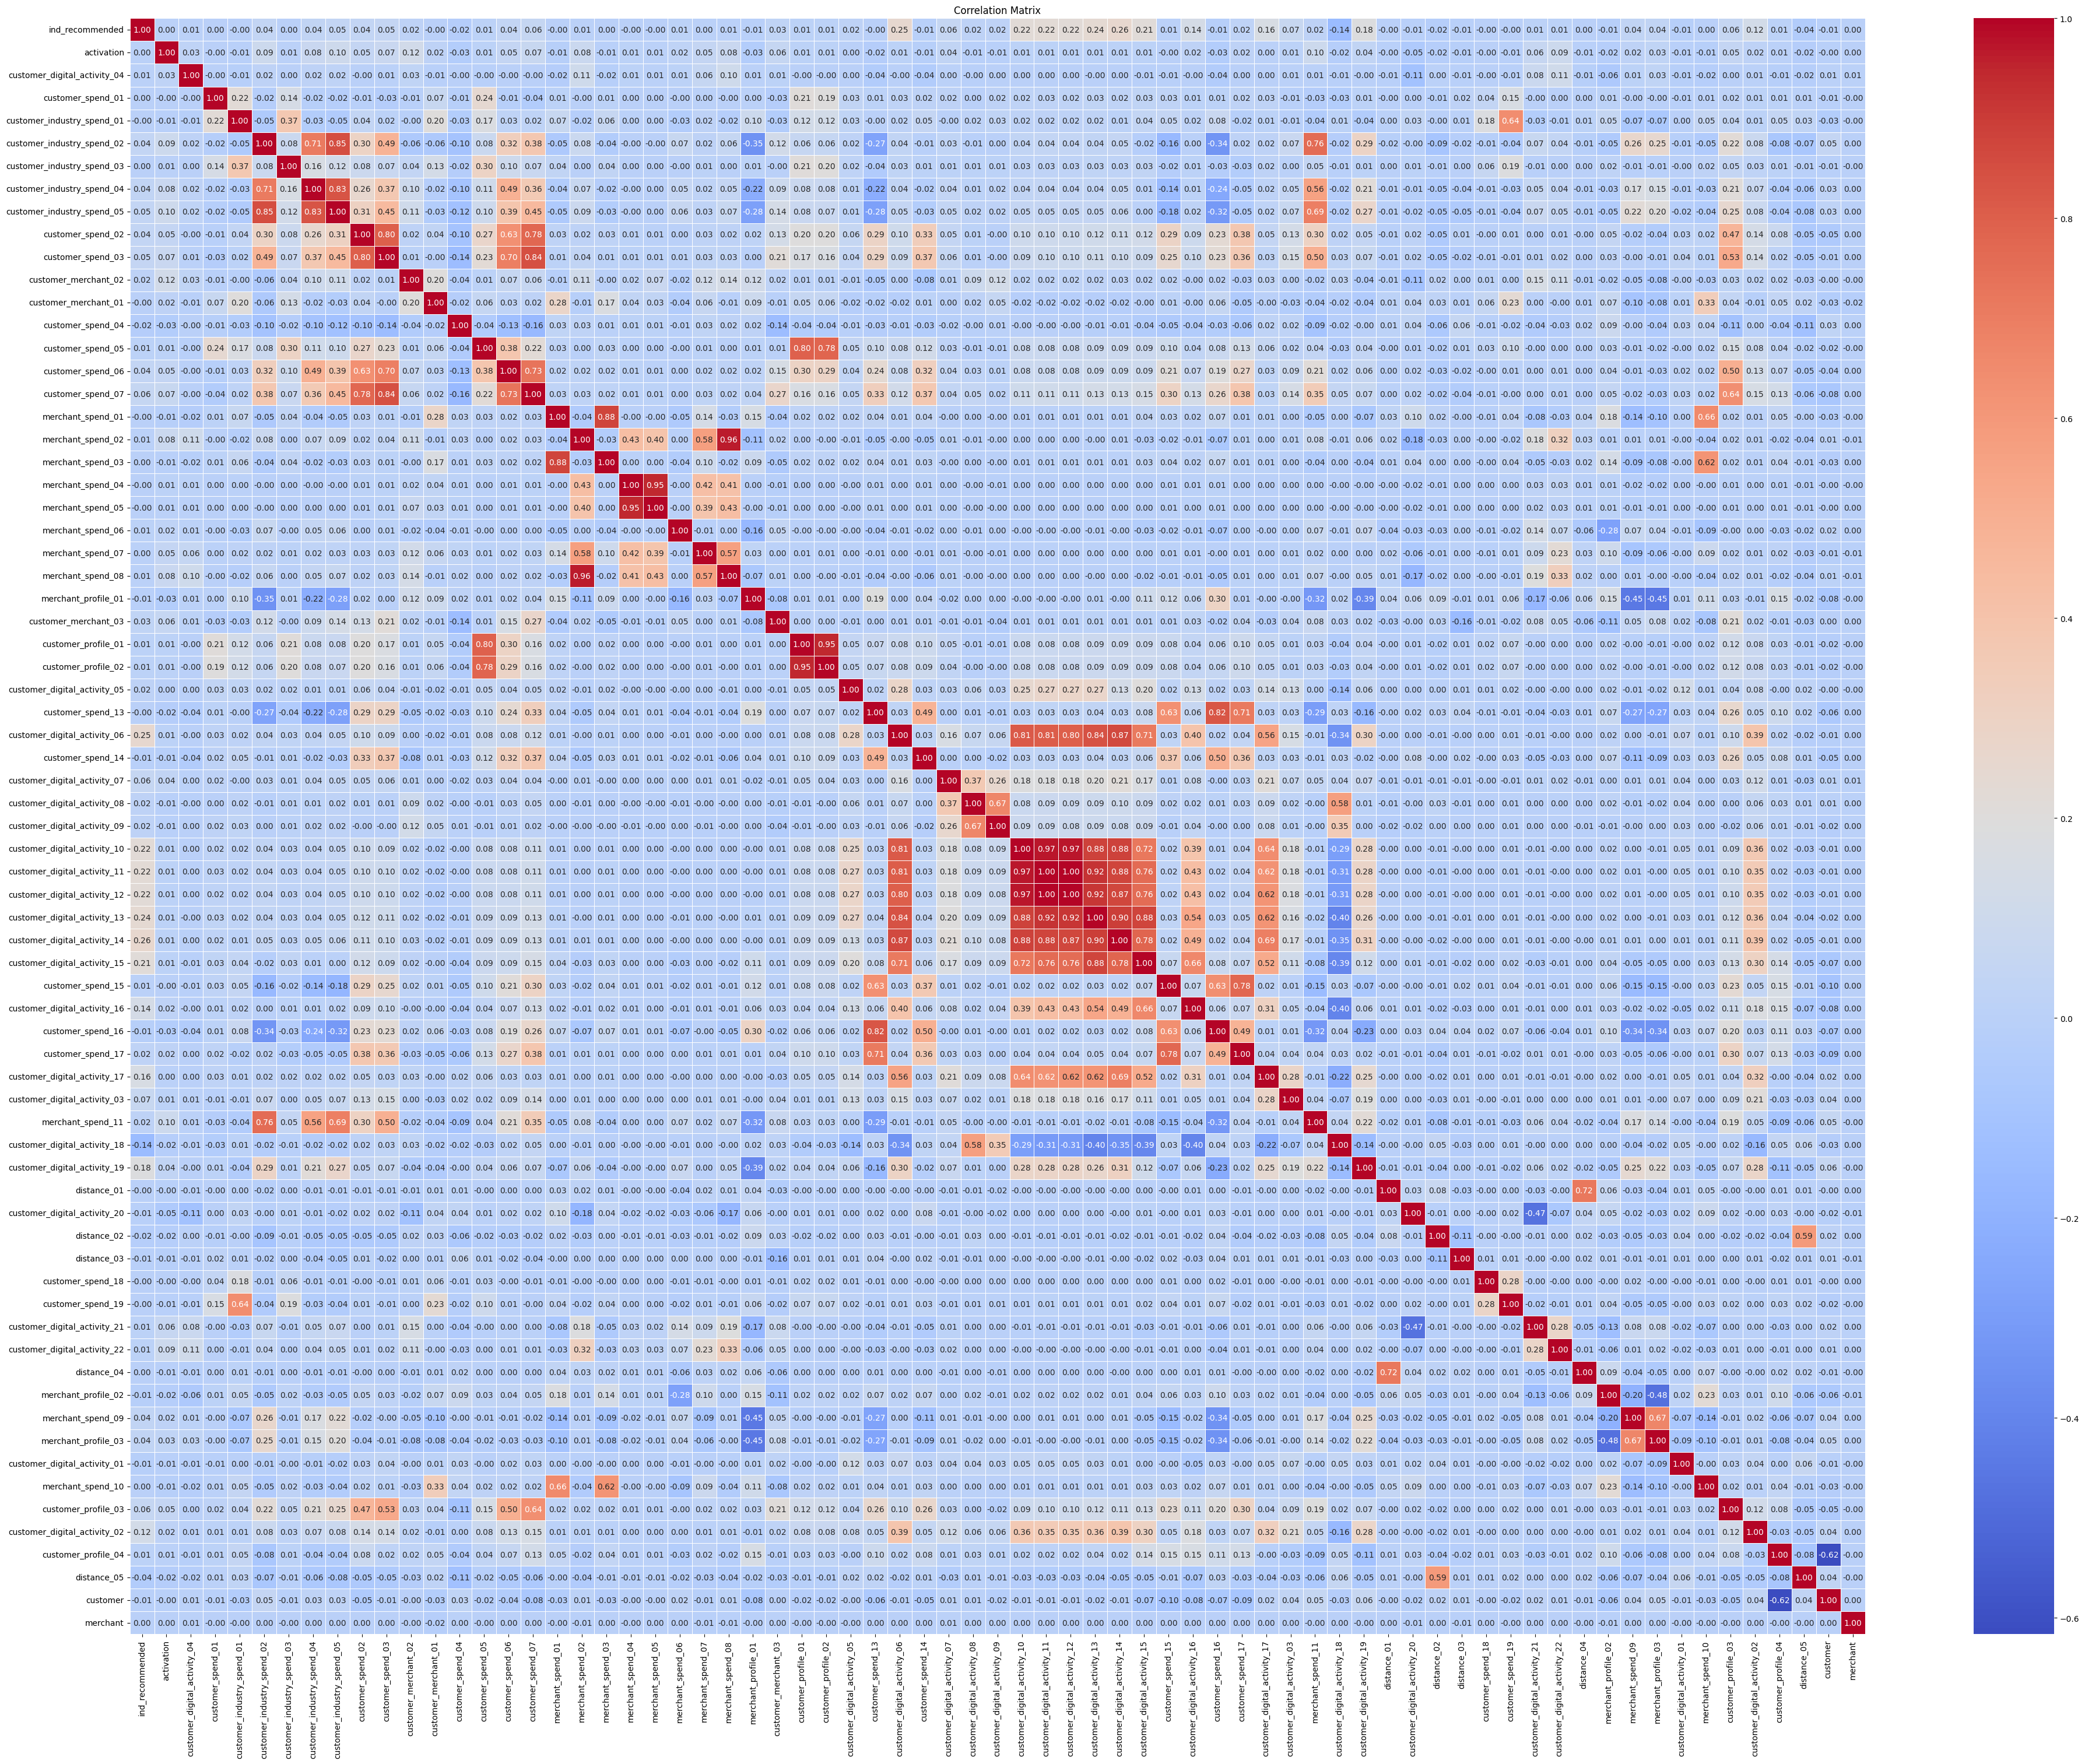

In [6]:
# Visualise the correlation matrix

plt.figure(figsize=(48, 36))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
"""Determine which features with more than NULL_THRESHOLD missing null values need to be removed.
Adjust NULL_THRESHOLD as needed to determine the optimal threshold for model performance.
"""

NULL_THRESHOLD = 9_000_000

columns_with_nulls = df.columns[df.isna().any()].tolist()
columns_to_drop = []
for column in columns_with_nulls:
    if df[column].isna().sum() > NULL_THRESHOLD:
        # print(f"{column}: {df[column].isna().sum()}")
        columns_to_drop.append(column)

In [8]:
"""Determine which pairs of features have a correlation greater than CORR_THRESHOLD.
Adjust CORR_THRESHOLD as needed to determine the optimal threshold for model performance.
"""

CORR_THRESHOLD = 0.8

# Find pairs with correlation > threshold
corr_pairs = correlation_matrix.unstack().sort_values(
    kind="quicksort"
)  # sorts from highest to lowest correlation
high_corr_pairs = corr_pairs[(abs(corr_pairs) > CORR_THRESHOLD) & (corr_pairs < 1.0)]

high_corr_pairs = high_corr_pairs.drop_duplicates()

# print(high_corr_pairs)
for pair in high_corr_pairs.index:
    column1, column2 = pair
    if column1 not in columns_to_drop:
        columns_to_drop.append(column1)
    if column2 not in columns_to_drop:
        columns_to_drop.append(column2)

/var/folders/hd/2s610yks5cngjgv9t700zzv80000gn/T/ipykernel_37828/462648013.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=null_values.index, y=null_values.values, palette=bar_colors.to_list())


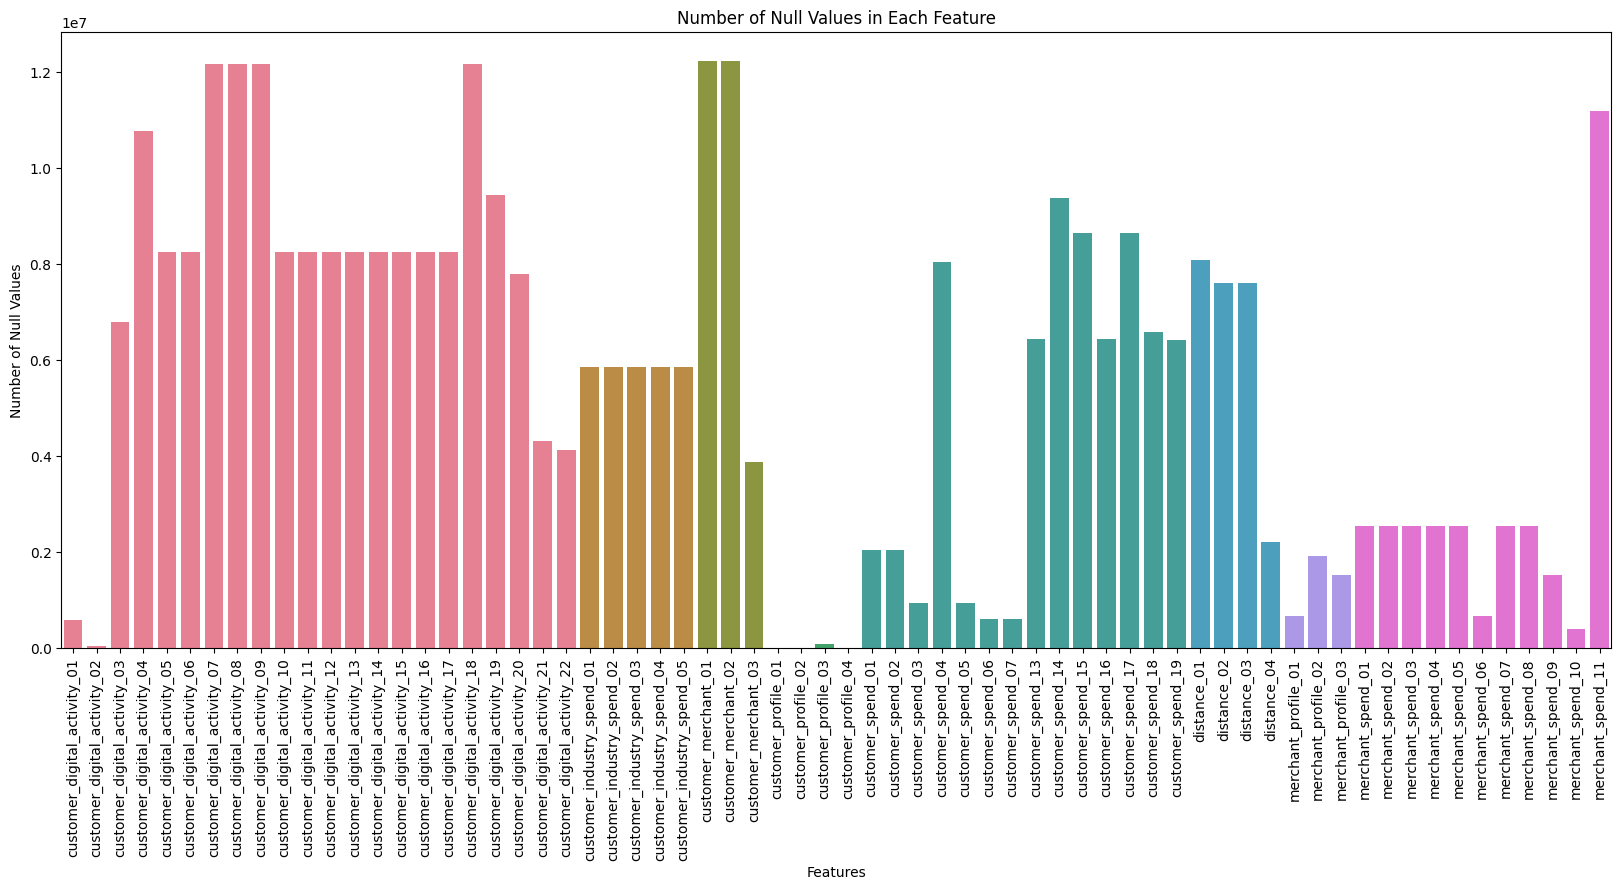

In [9]:
"""Visualise the null counts for each feature.
This may give us better insights into which features are suitable for model training.
"""

null_values = df.isna().sum()
null_values = null_values[null_values > 0]
null_values.sort_index(inplace=True)
prefixes = null_values.index.str.extract(r"(^.*?_)\d+")[0].fillna("")
unique_colors = sb.color_palette("husl", n_colors=len(prefixes.unique()))
color_mapping = {
    prefix: color for prefix, color in zip(prefixes.unique(), unique_colors)
}
bar_colors = prefixes.map(color_mapping)


plt.figure(figsize=(20, 8))
sb.barplot(x=null_values.index, y=null_values.values, palette=bar_colors.to_list())
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Number of Null Values")
plt.title("Number of Null Values in Each Feature")
plt.show()

In [10]:
# Drop the specified columns.

print(len(columns_to_drop))
filtered_df = df.copy()
filtered_df.drop(columns_to_drop, axis=1, inplace=True)
print(filtered_df.info())

32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229978 entries, 0 to 12229977
Data columns (total 39 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   ind_recommended               int64  
 1   activation                    int64  
 2   customer_spend_01             float64
 3   customer_industry_spend_01    float64
 4   customer_industry_spend_03    float64
 5   customer_spend_02             float64
 6   customer_spend_04             float64
 7   customer_spend_05             float64
 8   customer_spend_06             float64
 9   merchant_spend_06             float64
 10  merchant_spend_07             float64
 11  merchant_profile_01           float64
 12  customer_merchant_03          float64
 13  customer_digital_activity_05  float64
 14  customer_spend_15             float64
 15  customer_digital_activity_16  float64
 16  customer_spend_17             float64
 17  customer_digital_activity_17  float64
 18  customer_digital_

In [11]:
# Impute null values with the median of each column.

df_imputed = filtered_df.fillna(filtered_df.median())

In [12]:
# Verify that none of the remaining features have any NULL/NaN values left after imputation.

imputed_null_counts = df_imputed.isnull().sum()

# Filter the columns to include only those with null values
imputed_null_columns = imputed_null_counts[imputed_null_counts > 0]

imputed_null_columns

Series([], dtype: int64)

### End of Data Engineering

### Machine Learning

The goal now is to perform prediction on 2 dependent variables: ind_recommended and activation. We wish to first determine the probability of a merchant being recommended to a customer (prediction of ind_recommended), before determining the probability of the customer activating given that the merchant was recommended VS the probability of the customer activating given that the merchant was not recommended (both require prediction of activation).

In [13]:
# Split the dataset to predict activation.

"""X and y are for the prediction of the `activation` variable."""

from sklearn.model_selection import KFold

X = df_imputed.drop(
    columns=["activation", "customer", "merchant"]
)  # drop customer and merchant too as those are not features
y = df_imputed["activation"]

In [14]:
# Split the dataset to predict ind_recommended.

"""X_reco and y_reco are for the prediction of the `ind_recommended` variable."""

X_reco = df_imputed.drop(
    columns=["activation", "customer", "merchant", "ind_recommended"]
)  # drop customer and merchant too as those are not features
y_reco = df_imputed["ind_recommended"]

In [15]:
# For K-Fold cross-validation, we will use a 5-fold approach.

kf = KFold(n_splits=5, shuffle=True, random_state=99)

In [16]:
# Randomly sample MAX_SAMPLES indices for each k-fold and save them to ensure consistency across models.

"""We have purposefully left out the usage of MAX_SAMPLES here since our final model run did not involve any sampling.
We experimented with various sample sizes and deemed that sampling did not make much of a difference in terms of
training time nor model performance.
"""

# MAX_SAMPLES = 5_000_000

K_FOLD_INDICES = []

for train_index, test_index in kf.split(X, y):
    # Randomly sample indices for both training and testing
    # train_index = np.random.choice(
    #     train_index, size=min(len(train_index), MAX_SAMPLES), replace=False
    # )
    # test_index = np.random.choice(
    #     test_index, size=min(len(test_index), MAX_SAMPLES), replace=False
    # )

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    K_FOLD_INDICES.append([X_train, X_test, y_train, y_test])

In [17]:
# Same as the cell above, but for the prediction of ind_recommended.

K_FOLD_INDICES_RECO = []

for train_index, test_index in kf.split(X_reco, y_reco):
    # Randomly sample indices for both training and testing
    # train_index = np.random.choice(
    #     train_index, size=min(len(train_index), MAX_SAMPLES), replace=False
    # )
    # test_index = np.random.choice(
    #     test_index, size=min(len(test_index), MAX_SAMPLES), replace=False
    # )

    X_reco_train, X_reco_test = X_reco.iloc[train_index], X_reco.iloc[test_index]
    y_reco_train, y_reco_test = y_reco.iloc[train_index], y_reco.iloc[test_index]

    K_FOLD_INDICES_RECO.append([X_reco_train, X_reco_test, y_reco_train, y_reco_test])

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


class MLAlgorithmFactory:
    """Specify which ML model to use here.
    Since we will not be changing the model type during runtime, it is fine to specify the model at compile time.
    Clients need not know which actual ML model they are using for training.
    """

    model = XGBClassifier()

    @staticmethod
    def get_classifier_instance():
        return MLAlgorithmFactory.model

    @staticmethod
    def _get_model_prefix() -> str:
        return "XGBoost"

    @staticmethod
    def get_k_fold_score(clf, X, y) -> None:
        scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

        print("Cross-validation scores:", scores)

        print("Mean accuracy:", scores.mean())

In [20]:
"""Using ML Models to predict ind_recommended."""

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# XGB_BEST_PARAMS = {"learning_rate": 0.1, "max_depth": 5, "n_estimators": 300}

# Instantiate Classifier
clf_reco = MLAlgorithmFactory.get_classifier_instance()

scores_reco = []
for X_reco_train, X_reco_test, y_reco_train, y_reco_test in K_FOLD_INDICES_RECO:

    clf_reco.fit(X_reco_train, y_reco_train)
    y_reco_pred = clf_reco.predict(X_reco_test)

    score_reco = accuracy_score(y_reco_test, y_reco_pred)
    scores_reco.append(score_reco)

# Display cross-validation scores
print("Cross-validation scores:", scores_reco)

# Compute mean cross-validation score
mean_score = sum(scores_reco) / len(scores_reco)
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.8766477950086591, 0.8764638208729696, 0.8766208121354246, 0.8770806972213762, 0.8770373610739188]
Mean cross-validation score: 0.8767700972624697


In [23]:
# Save the random forest classifier model to joblib

from joblib import dump

dump(clf_reco, f"{MLAlgorithmFactory._get_model_prefix()}/reco.joblib")

['XGBoost/reco.joblib']

In [18]:
# Load the classifier model

# This has been left here in case we wish to load a pre-saved model - simply comment out the above 2 cells.

from joblib import load

clf_reco = load(f"{MLAlgorithmFactory._get_model_prefix()}/reco.joblib")

In [26]:
"""XGBoost to predict activation."""

from sklearn.model_selection import GridSearchCV

# # Define hyperparameter grid
# param_grid = {
#     "max_depth": [3, 5, 10],
#     "learning_rate": [0.1, 0.01, 0.2],
#     "n_estimators": [100, 200, 300],
# }

# Instantiate XGBoost Classifier
# xgb = XGBClassifier()

# # Perform grid search
# grid_search = GridSearchCV(
#     estimator=xgb, param_grid=param_grid, scoring="accuracy"
# )
# grid_search.fit(X_train, y_train)

# # Get best hyperparameters
# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

# # Evaluate best model
# clf = grid_search.best_estimator_
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# XGB_BEST_PARAMS = {"learning_rate": 0.1, "max_depth": 5, "n_estimators": 300}

# Instantiate Classifier
clf = MLAlgorithmFactory.get_classifier_instance()

scores = []
for X_train, X_test, y_train, y_test in K_FOLD_INDICES:

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Display cross-validation scores
print("Cross-validation scores:", scores)

# Compute mean cross-validation score
mean_score = sum(scores) / len(scores)
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.9942612334607251, 0.9942824926941827, 0.994252239169647, 0.994233021735531, 0.994309473240951]
Mean cross-validation score: 0.9942676920602074


In [27]:
# Save the classifier model to joblib

dump(clf, f"{MLAlgorithmFactory._get_model_prefix()}/activation.joblib")

['XGBoost/activation.joblib']

In [19]:
# Load the classifier model

clf = load(f"{MLAlgorithmFactory._get_model_prefix()}/activation.joblib")

In [20]:
# Load the eval dataset

load_dotenv()

EVAL_DATA = os.environ.get("EVAL_DATA")

eval_df = pd.read_csv(EVAL_DATA)

eval_df.head()

,distance_05,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,customer_spend_03,...,merchant_profile_02,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,customer,merchant
0,1.621171,NaN,112.3340,80.5525,9.0,966.63,12.0,10.0,4.0,41.0,...,0.437500,26299.0,4777.0,0.8,33.30,72.268283,7.0,423.0,467915,599167
1,2.441944,NaN,112.3340,NaN,NaN,NaN,NaN,NaN,4.0,41.0,...,0.397059,7122.0,4803.0,0.8,793.29,72.268283,7.0,423.0,467915,686617
2,2.438082,NaN,112.3340,71.1925,3.0,284.77,4.0,4.0,4.0,41.0,...,NaN,7222.0,14860.0,0.8,100.00,72.268283,7.0,423.0,467915,829193
3,2.072182,NaN,112.3340,NaN,NaN,NaN,NaN,NaN,4.0,41.0,...,0.142857,11410.0,11968.0,0.8,252.38,72.268283,7.0,423.0,467915,1077034
4,2.380853,NaN,302.7925,NaN,NaN,NaN,NaN,NaN,3.0,37.0,...,0.100000,1847.0,5842.0,0.8,87.50,72.268283,7.0,423.0,467915,876647


In [21]:
# Only include features used in model training.

features_eval = filtered_df.columns.to_list()

# Remove ind_recommended and activation from columns to keep
if "ind_recommended" in features_eval:
    features_eval.remove("ind_recommended")
if "activation" in features_eval:
    features_eval.remove("activation")

eval_df = eval_df.loc[:, features_eval]

# Impute null values with mean

eval_imputed = eval_df.fillna(eval_df.mean())

# Verify that none of the remaining features have any NULL/NaN values left after imputation

eval_imputed_null_counts = eval_imputed.isnull().sum()

# Filter the columns to include only those with null values
eval_imputed_null_columns = eval_imputed_null_counts[eval_imputed_null_counts > 0]

eval_imputed_null_columns

Series([], dtype: int64)

In [22]:
# Run the model on the eval dataset twice, once for ind_recommended = 1 and = 0.

# First predict ind_recommended on the eval dataset.
"""Predict ind_recommended values"""

X_eval = eval_imputed.drop(columns=["customer", "merchant"])

# reorder the columns of X_eval to match that of X
column_order = X.columns
X_eval = X_eval.reindex(columns=column_order)

# Drop the ind_recommended ground truth col that appears after reordering
X_eval.drop(columns=["ind_recommended"], inplace=True)

# Predict ind_recommended with the clf_reco model
y_reco_eval = clf_reco.predict_proba(X_eval)[:, 1]

y_not_reco_eval = clf_reco.predict_proba(X_eval)[:, 0]


# Then, predict activation GIVEN that the merchant was recommeded to the customer.
"""RECOMMENDED"""
X_eval["ind_recommended"] = 1

X_eval = X_eval.reindex(columns=column_order)

# Predict probabilities
y_proba_eval = clf.predict_proba(X_eval)[:, 1]

# Add the predicted probabilities as a new column to the test dataset
X_eval["activation_recommended"] = y_proba_eval


# Finally, predict activation GIVEN that the merchant was not recommended to the customer.
"""NOT RECOMMENDED"""
X_eval["ind_recommended"] = 0

# We reuse the X_eval but ignore the previously computed activation column
X_eval_final = X_eval.drop(columns=["activation_recommended"])

# Predict probabilities
y_proba_eval = clf.predict_proba(X_eval_final)[:, 1]

# Add the predicted probabilities as a new column to the test dataset
X_eval["activation_not_recommended"] = y_proba_eval

### Add the predicted ind_recommended to the test dataset
X_eval["ind_recommended"] = y_reco_eval
X_eval["ind_not_recommended"] = y_not_reco_eval

In [23]:
# Now that our predictions are done, we can add the pred_col to the eval dataset.

"""The formula for predicted_score is as such:
P(activation = 1 | recommended = 1) * P(recommended = 1) - P(activation = 1 | recommended = 0) * P(recommended = 0)

It seems that adding a constant multiplier, let's call it `alpha`, increases the final score by giving greater weightage to the
probability of activation given that the merchant was recommended to the customer.

We perform binary search to (approximately) determine the optimal value of `alpha` that maximises our goal.
"""

ALPHA = 3.01  # adjust as needed

eval_imputed["predicted_score"] = (
    X_eval["activation_recommended"] * X_eval["ind_recommended"] * ALPHA
    - X_eval["activation_not_recommended"] * X_eval["ind_not_recommended"]
)

### Optimal value of alpha (Results of binary search)
Note: Due to the limited number of daily submissions, we cannot optimise this further. However, the goal score seems to converge to a maximum when alpha ~ 3.00.

We started out with an initial guess of ALPHA = 1.5, then 2.

1. Submission 23: 0.0008752, alpha = 1.5
2. Submission 24: 0.0009787, alpha = 2
3. Submission 25: 0.001162, alpha = 3
4. Submission 26: 0.0003243, alpha = 10 (Widen upper bound, found that objective decreases significantly.)
5. Submission 27: 0.0007661, alpha = 6
6. Submission 28: 0.0009583, alpha = 4
7. Submission 29: 0.00106, alpha = 3.5
8. Submission 30: 0.0011244, alpha = 3.25
9. Submission 31: 0.0011528, alpha = 3.1

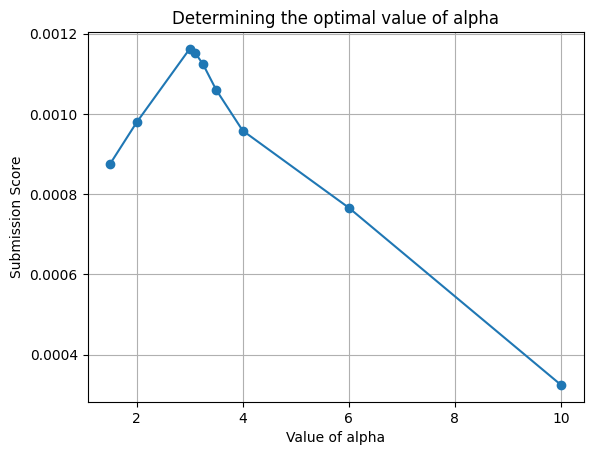

In [34]:
# Visualise the binary search results.

alpha_x = [10, 6, 4, 3.5, 3.25, 3.1, 3, 2, 1.5]

alpha_y = [
    0.0003243,
    0.0007661,
    0.0009583,
    0.00106,
    0.0011244,
    0.0011528,
    0.001162,
    0.0009787,
    0.0008752,
]

# Plot the data
plt.plot(
    alpha_x, alpha_y, marker="o", linestyle="-"
)  # 'o' marker for data points, '-' line style
plt.xlabel("Value of alpha")
plt.ylabel("Submission Score")
plt.title("Determining the optimal value of alpha")
plt.grid(True)  # Add grid lines
plt.show()

In [24]:
"""We leverage the provided test code to gain a sensing if our results make sense."""

# Generate the pred_score column on the ORIGINAL DATASET
# Eval dataset cannot be used since it is missing the ind_recommended and activation columns
# We will mimic what happens to the eval dataset, except on the original dataset.


def generate_pred_score(X_sampled, y_sampled, X_reco_sampled, y_reco_sampled):
    """X_sampled is the same as X above
    It contains all features except customer, merchant, activation. It contains ind_recommended.

    We want to:
    1. Using purely the features alone, predict probability of ind_recommended being 1
    2. Using purely the features alone, predict probability of ind_recommended being 0
    3. Using features + ind_recommended = 1, predict probability of activation. This is activation given reco.
    4. Using features + ind_recommended = 0, predict probability of activation. This is activation without reco.
    5. Calculate the predicted score.

    y_sampled contains only the activation column.
    """
    X_copy, y_copy, X_reco_copy, y_reco_copy = (
        X_sampled.copy(),
        y_sampled.copy(),
        X_reco_sampled.copy(),
        y_reco_sampled.copy(),
    )  # prevent mutation of original dataframes

    # Predict the probability of ind_recommended being 1
    y_predicted_ind_reco_one = clf_reco.predict_proba(X_reco_copy)[:, 1]

    # Predict the probability of ind_recommended being 0
    y_predicted_ind_reco_zero = clf_reco.predict_proba(X_reco_copy)[:, 0]

    # Predict the probability of activation given ind_recommended = 1
    X_copy["ind_recommended"] = 1
    y_predicted_activation_reco = clf.predict_proba(X_copy)[:, 1]

    # Predict the probability of activation given ind_recommended = 0
    X_copy["ind_recommended"] = 0
    y_predicted_activation_no_reco = clf.predict_proba(X_copy)[:, 1]

    # Restore the original ind_recommended column
    X_copy["ind_recommended"] = y_reco_copy.values

    # Add the predicted probabilities as a new column to the test dataset
    X_copy["predicted_score"] = (
        y_predicted_ind_reco_one * y_predicted_activation_reco
        - y_predicted_ind_reco_zero * y_predicted_activation_no_reco
    )

    # Add the ground truth activation column back to X_sampled
    X_copy["activation"] = y_copy.values

    return X_copy

### Test the scoring function

In [25]:
# Test the scoring function provided

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from scoring_code import incr_act_top10

with open("scores.txt", "w+") as f:
    for i in range(1):
        X_sampled_test = generate_pred_score(X, y, X_reco, y_reco)
        
        # Add the customer and merchant columns back on to the dataset
        X_sampled_test["customer"] = df_imputed["customer"].values
        X_sampled_test["merchant"] = df_imputed["merchant"].values

        score = incr_act_top10(input_df=X_sampled_test, pred_col="predicted_score")

        f.write(str(score) + "\n")

   ind_recommended  avg_30d_act
0                0     0.000489
1                1     0.001984


In [26]:
# Peek at the values of our predicted columns as a sanity check.

test_features = ["activation_recommended", "activation_not_recommended", "ind_recommended", "ind_not_recommended"]

X_eval[test_features]

,activation_recommended,activation_not_recommended,ind_recommended,ind_not_recommended
0,0.001196,0.001737,0.134526,0.865474
1,0.000325,0.000674,0.139324,0.860676
2,0.001401,0.001928,0.139030,0.860970
3,0.002034,0.003162,0.203926,0.796074
4,0.000781,0.000981,0.229607,0.770393
...,...,...,...,...
12604595,0.003960,0.004547,0.048675,0.951325
12604596,0.000965,0.000866,0.443891,0.556109
12604597,0.001875,0.002453,0.157051,0.842949
12604598,0.000967,0.001095,0.308531,0.691469


### Generate csv for submission

In [29]:
# Extract the submission columns

submission_columns = ["customer", "merchant", "predicted_score"]
submission_df = eval_imputed[submission_columns].copy()

In [30]:
submission_df.head()

,customer,merchant,predicted_score
0,467915,599167,-0.001019
1,467915,686617,-0.000444
2,467915,829193,-0.001074
3,467915,1077034,-0.001269
4,467915,876647,-0.000216


In [31]:
submission_df.shape[0]

12604600

In [33]:
"""Count the number of current submissions so far"""

SUBMISSIONS_DIR = "submissions/"

submissions = os.listdir(SUBMISSIONS_DIR)

submissions_count = len(submissions)

submissions_count

0

In [121]:
submission_df.to_csv(f"{SUBMISSIONS_DIR}submission_{submissions_count + 1}.csv")